# Space Mission Analysis

In this notebook, I will analyze a dataset related to space missions from 1957 to August 2022. The dataset was sourced from [Maven Analytics](https://www.mavenanalytics.io/data-playground?page=6&pageSize=5).

## Dataset Fields

| Field          | Description                                                              |
|----------------|--------------------------------------------------------------------------|
| Company        | Company responsible for the space mission                                |
| Location       | Location of the launch                                                   |
| Date           | Date of the launch                                                       |
| Time           | Time of the launch (UTC)                                                 |
| Rocket         | Name of the rocket used for the mission                                  |
| Mission        | Name of the space mission (or missions)                                  |
| RocketStatus   | Status of the rocket as of August 2022 (Active or Inactive)              |
| Price          | Cost of the rocket in millions of US dollars                             |
| MissionStatus  | Status of the mission (Success, Failure, Partial Failure, Prelaunch Failure) |


First, let's import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset.

In [61]:
df = pd.read_csv("space_missions.csv", encoding='ISO-8859-1')

In [62]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


# Data Wrangling

Let's check the types of the data:

In [63]:
df.dtypes

Company          object
Location         object
Date             object
Time             object
Rocket           object
Mission          object
RocketStatus     object
Price            object
MissionStatus    object
dtype: object

I can see that there are many data that there aren't in the correct data type. The Date column should be in datetime format, also, the Price column should be a float type. So let's fix this.

In [64]:
# Change the type of the Date column
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
# Change the type of the Price column
# First, replace the , symbol with a blank space
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)

In [66]:
# Check again the types of data to see if everything is ok
df.dtypes

Company                  object
Location                 object
Date             datetime64[ns]
Time                     object
Rocket                   object
Mission                  object
RocketStatus             object
Price                   float64
MissionStatus            object
dtype: object

Now let's chek how many missing values are in the dataframe:

In [67]:
df.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [68]:
# Check the % of the missing values
df.isnull().sum()/len(df)*100

Company           0.000000
Location          0.000000
Date              0.000000
Time              2.742981
Rocket            0.000000
Mission           0.000000
RocketStatus      0.000000
Price            72.678186
MissionStatus     0.000000
dtype: float64

From this I can see that the Time column has the 2.74% of missing values (corresponding at 127 values) and that the Price column has the 72,6% of the missing values (corresponding at 3365 values).

If we have a column with a very high percentage of missing values, such as 72%, replacing the missing values with the mean or another statistical value may not be appropriate, because the substitute value (such as the mean) may not accurately represent the original data. In the end, replacing many missing values with a single value can introduce bias into the analysis results.

## Calculate the number of each Location, Company, type of Rocket, Mission, the Rocket status and the Mission status

In [69]:
# Use this to show all the result from the operations
pd.set_option('display.max_rows', None)

In [70]:
df['Location'].value_counts()

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan                                                 251
Site 132/1, Plesetsk Cosmodrome, Russia                                                    216
Site 43/4, Plesetsk Cosmodrome, Russia                                                     211
Site 41/1, Plesetsk Cosmodrome, Russia                                                     198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                                                  193
Site 132/2, Plesetsk Cosmodrome, Russia                                                    174
Site 133/3, Plesetsk Cosmodrome, Russia                                                    158
LC-39A, Kennedy Space Center, Florida, USA                                                 149
Site 43/3, Plesetsk Cosmodrome, Russia                                                     141
ELA-2, Guiana Space Centre, French Guiana, France                                          118
ELA-3, Guiana Space Centre, French Guiana

From this I can see that there are many location that can be grouped in a unique state, such as Russia or Usa, so we might think to create a new column called "State" to use later fro graphics rapresentations.

In [71]:
# we are splitting the string from the last comma, 1 specifies the maximum number of splits to perform. 
# Since it is 1, the method will split the string only once, starting from the last occurrence of the separator.
# Then, since the split returns a list, we take the last element of the list (which is the state)
df['State'] = df['Location'].apply(lambda x: x.rsplit(',', 1)[-1])
df['State']

0                            Kazakhstan
1                            Kazakhstan
2                                   USA
3                                   USA
4                                   USA
5                                   USA
6                                   USA
7                                   USA
8                            Kazakhstan
9                                   USA
10                           Kazakhstan
11                                  USA
12                                  USA
13                                  USA
14                                  USA
15                                  USA
16                                  USA
17                                  USA
18                                  USA
19                                  USA
20                                  USA
21                                  USA
22                           Kazakhstan
23                                  USA
24                                  USA


In [72]:
df['State'].value_counts()

State
USA                               1467
Russia                            1416
Kazakhstan                         719
China                              365
France                             318
Japan                              130
India                               82
Pacific Ocean                       36
New Zealand                         28
Iran                                16
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
South Korea                          5
New Mexico                           4
Yellow Sea                           3
Brazil                               3
Barents Sea                          3
Gran Canaria                         2
Pacific Missile Range Facility       1
Shahrud Missile Test Site            1
Name: count, dtype: int64

From this I can see that the USA and Russia are the 2 states with the most launches.

In [73]:
df['Company'].value_counts()

Company
RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Martin Marietta      114
Northrop              89
MHI                   87
ISRO                  82
Lockheed              79
Roscosmos             69
ILS                   46
Sea Launch            36
ISAS                  30
Rocket Lab            28
Kosmotras             22
Blue Origin           21
US Navy               17
ExPace                15
ISA                   15
ESA                   14
Eurockot              13
IAI                   11
Starsem               10
ASI                    9
AMBA                   8
CNES                   8
JAXA                   8
Land Launch            7
MITT                   7
Astra                  7
CASIC                  6
KCST                   5
UT                     5
Virgin Orbit     

In [74]:
df['Rocket'].value_counts()

Rocket
Cosmos-3M (11K65M)          446
Voskhod                     299
Molniya-M /Block ML         128
Cosmos-2I (63SM)            126
Soyuz U                     125
Tsyklon-3                   122
Falcon 9 Block 5            111
Tsyklon-2                   106
Vostok-2M                    93
Molniya-M /Block 2BL         87
Ariane 5 ECA                 80
Delta II 7925                62
Atlas-SLV3 Agena-D           47
Vostok-2                     45
Molniya-M /Block L           44
Long March 2D                44
Long March 2C                43
Ariane 44L                   41
Long March 3B/E              41
Molniya                      40
Space Shuttle Discovery      39
Atlas V 401                  39
Thor DM-21 Agena-B           38
Cosmos-2I (63S1)             38
Zenit-2                      37
Zenit-3 SL                   36
Space Shuttle Atlantis       33
Soyuz                        32
Rokot/Briz KM                31
H-IIA 202                    31
Proton K/Block D             30
P

In [75]:
df['Mission'].value_counts()

Mission
DSP                                                    8
Demo Flight                                            8
KH-11                                                  6
BOR-5 Shuttle                                          6
Osumi                                                  5
KH-9                                                   5
10-Kilometer Test Flight                               4
Unknown Payload                                        4
BOR-2 Shuttle                                          4
Zond                                                   4
Test Flight                                            3
Strela-2M satellite                                    3
BOR-4 Shuttle                                          3
Shinsei                                                2
Cosmos 554                                             2
DemoSat                                                2
Cosmos 1242                                            2
Himawari 6             

In [76]:
df['RocketStatus'].value_counts()

RocketStatus
Retired    3620
Active     1010
Name: count, dtype: int64

I can also see that the majority of the Space Missions are terminated with a successful launch.

# Create a Class column from MissionStatus column

As first thing I use the MissionStatus column to counts the landing outcomes of the missions and store them in a variable.

In [77]:
landing_outcome = df['MissionStatus'].value_counts()
print(landing_outcome)

MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64


Then, I use a for loop to obtain the indexes and the values from the landing_outcome variables.

In [78]:
for i,outcome in enumerate(landing_outcome.keys()):
    print(i,outcome)

0 Success
1 Failure
2 Partial Failure
3 Prelaunch Failure


Now, I create a set of bad outcomes:

In [79]:
bad_outcomes=set(landing_outcome.keys()[[1,2,3]])
print(bad_outcomes)
print(type(bad_outcomes))

{'Failure', 'Partial Failure', 'Prelaunch Failure'}
<class 'set'>


Using the <code>MissionStatus</code>,  I create a list where the element is zero if the corresponding  row  in  <code>MissionStatus</code> is in the set <code>Failure</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:

In [80]:
# landing_class = 0 if Failure, Partial Failure, Prelaunch Failure
# landing_class = 1 if Success
landing_class = df['MissionStatus'].map(lambda x: 0 if x in bad_outcomes else 1)

In [81]:
df['Class']=landing_class

Now, I can use the following line to determinate a success rate:

In [83]:
df["Class"].mean()

0.8989200863930885

I can now export it to a CSV for the next section:

In [84]:
df.to_csv("dataset_cleaned.csv", index=False)

# Exploratory Data Analysis with SQL

In [85]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [86]:
import csv, sqlite3

con = sqlite3.connect("space_missions.db")
cur = con.cursor()

In [87]:
%sql sqlite:///space_missions.db

In [88]:
dimensione_chunk = 1000
data = pd.read_csv("dataset_cleaned.csv")
data.to_sql("SPACETBL", con, if_exists='replace', index=False, method="multi", chunksize=dimensione_chunk)

4630

Remove blank rows from table

In [89]:
%sql create table SPACETABLE as select * from SPACETBL where Date is not null

 * sqlite:///space_missions.db
(sqlite3.OperationalError) table SPACETABLE already exists
[SQL: create table SPACETABLE as select * from SPACETBL where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Display a general view of the table SPACETABLE:

In [90]:
%sql SELECT * FROM SPACETABLE LIMIT 5;

 * sqlite:///space_missions.db
Done.


Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,State,Class
RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,None,Success,Kazakhstan,1
RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,None,Success,Kazakhstan,1
US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,None,Failure,USA,0
AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,None,Success,USA,1
US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,None,Failure,USA,0


Display the names of the unique launch sites (location) in the space mission:

In [91]:
%sql SELECT DISTINCT Location FROM SPACETABLE;

 * sqlite:///space_missions.db
Done.


Location
"Site 1/5, Baikonur Cosmodrome, Kazakhstan"
"LC-18A, Cape Canaveral AFS, Florida, USA"
"LC-26A, Cape Canaveral AFS, Florida, USA"
"LC-5, Cape Canaveral AFS, Florida, USA"
"Douglas F4D Skyray, Naval Air Station Point Mugu, California, USA"
"SLC-17A, Cape Canaveral AFS, Florida, USA"
"LC-11, Cape Canaveral AFS, Florida, USA"
"SLC-1W (75-3-4), Vandenberg AFB, California, USA"
"SLC-1E (75-3-5), Vandenberg AFB, California, USA"
"LC-14, Cape Canaveral AFS, Florida, USA"


List the date when the first succesful landing outcome was acheived:

In [92]:
%sql SELECT MIN(Date) as Date FROM SPACETABLE WHERE Class = 1;

 * sqlite:///space_missions.db
Done.


Date
1957-10-04


List the total number of successful and failure mission outcomes:

In [93]:
%sql SELECT COUNT(MissionStatus) AS TotalOutcome FROM SPACETABLE;

 * sqlite:///space_missions.db
Done.


TotalOutcome
4630


List the records which displays the month names, failure landing_outcomes for the months in year 2021:

In [142]:
%sql SELECT substr(Date, 6, 2) AS Month, MissionStatus, Rocket, Company FROM SPACETABLE WHERE substr(Date, 1, 4)='2021' AND Class = 0;

 * sqlite:///space_missions.db
Done.


Month,MissionStatus,Rocket,Company
02,Failure,Hyperbola-1,i-Space
02,Partial Failure,Starship Prototype,SpaceX
03,Partial Failure,Starship Prototype,SpaceX
03,Failure,Starship Prototype,SpaceX
05,Failure,Electron/Curie,Rocket Lab
08,Failure,Hyperbola-1,i-Space
08,Failure,GSLV Mk II,ISRO
08,Failure,Rocket 3,Astra
09,Failure,Firefly Alpha,Firefly
10,Failure,KSLV-2,KARI


List the first 5 countries which have had the most successful space missions:

In [95]:
%sql SELECT State, COUNT(*) AS Successful_Missions FROM SPACETABLE WHERE MissionStatus = 'Success' GROUP BY State ORDER BY Successful_Missions DESC LIMIT 5;


 * sqlite:///space_missions.db
Done.


State,Successful_Missions
Russia,1323
USA,1298
Kazakhstan,625
China,335
France,299


List the TOP 3 rocketS which has been used for the most space missions:

In [96]:
%sql SELECT Rocket, State, COUNT(*) AS Mission_Count FROM SPACETABLE GROUP BY Rocket ORDER BY Mission_Count DESC LIMIT 3; 

 * sqlite:///space_missions.db
Done.


Rocket,State,Mission_Count
Cosmos-3M (11K65M),Russia,446
Voskhod,Kazakhstan,299
Molniya-M /Block ML,Russia,128


List the first 5 rockets most used in space missions:

In [97]:
%sql SELECT Company, Rocket, COUNT(*) AS Time_used_rocket FROM SPACETABLE GROUP BY Rocket ORDER BY Time_used_rocket DESC LIMIT 5;

 * sqlite:///space_missions.db
Done.


Company,Rocket,Time_used_rocket
RVSN USSR,Cosmos-3M (11K65M),446
RVSN USSR,Voskhod,299
RVSN USSR,Molniya-M /Block ML,128
RVSN USSR,Cosmos-2I (63SM),126
RVSN USSR,Soyuz U,125


List the first 5 rockets with the highest success rate:

In [114]:
%sql SELECT Company, Rocket, COUNT(*) AS Mission_Count, AVG(Class) AS Success_Rate FROM SPACETABLE GROUP BY Rocket ORDER BY Success_Rate DESC, Mission_Count DESC LIMIT 5;


 * sqlite:///space_missions.db
Done.


Company,Rocket,Mission_Count,Success_Rate
SpaceX,Falcon 9 Block 5,111,1.0
CASC,Long March 2C,43,1.0
NASA,Space Shuttle Discovery,39,1.0
NASA,Space Shuttle Atlantis,33,1.0
MHI,H-IIA 202,31,1.0


List the rockets which did have not success launch in 1958's (which is the year with the lower success rate):

In [160]:
%sql SELECT substr(Date, 1, 4) AS Year, MissionStatus, Rocket, Company FROM SPACETABLE WHERE substr(Date, 1, 4)='1958' AND Class = 0;

 * sqlite:///space_missions.db
Done.


Year,MissionStatus,Rocket,Company
1958,Failure,Vanguard,US Navy
1958,Failure,Juno I,AMBA
1958,Failure,Sputnik 8A91,RVSN USSR
1958,Failure,Vanguard,US Navy
1958,Failure,Vanguard,US Navy
1958,Failure,Vanguard,US Navy
1958,Failure,NOTS-EV-1 Pilot II,US Navy
1958,Failure,NOTS-EV-1 Pilot II,US Navy
1958,Failure,Thor-DM 18 Able I,US Air Force
1958,Failure,NOTS-EV-1 Pilot II,US Navy


# Data Visualization

## Bar Plot

First, I'm goint to plot a frequency graph to show in which state there are most launches.

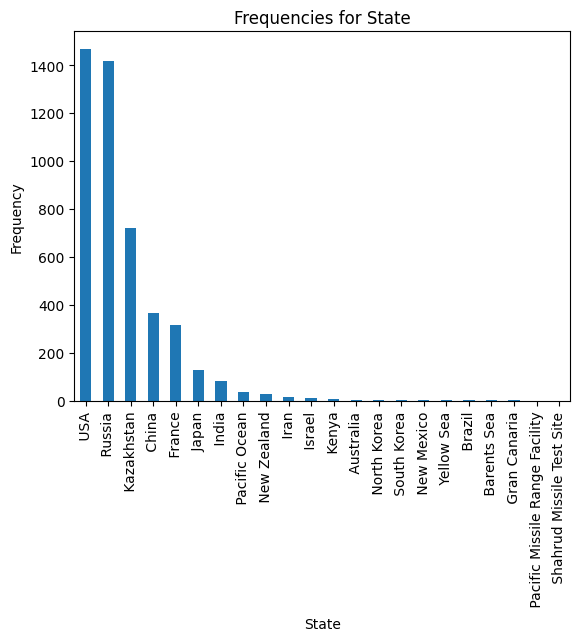

In [188]:
# Count the frequency of the State column
state_frequencies = df['State'].value_counts()

# Plot
state_frequencies.plot(kind='bar')
plt.title('Frequency of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()


I can see that the two major state are USA and Russia, followed by Kazakhstan. It's plausible considering that the United States and Russia have had numerous space programs and active launch sites. The United States, through NASA, has had a long history of space exploration, while Russia (formerly the Soviet Union - URSS) has been equally active in developing and launching spacecraft. These two countries have been among the world leaders in space exploration and rocket launches, so it's reasonable that they have the highest number of launches represented in your dataset.

### This barplot shows the first five rockets most utilized for space missions.

Visualize the first five rockets most utilized for missions and the top 5 rockets with the highly % of success rate:

In [101]:
# Calculate the number of mission per rocket
rocket_missions = df.groupby('Rocket').size().reset_index(name='Mission_Count')

In [102]:
# Calculate the % of success mission per rocket
rocket_success_rate = df.groupby('Rocket').agg(Mission_Count=('Class', 'count'), Success_Rate=('Class', 'mean')).reset_index()

In [109]:
# Create a dataframe which contains all new infos
rocket_stats = df.groupby('Rocket').agg(Mission_Count=('Class', 'count'), Success_Rate=('Class', 'mean')).reset_index()

In [110]:
# Order the rockets based on the number of missions or the % of success
rocket_stats_sorted_by_missions = rocket_stats.sort_values(by='Mission_Count', ascending=False)
rocket_stats_sorted_by_success_rate = rocket_stats.sort_values(by=['Success_Rate', 'Mission_Count'], ascending=[False, False])

In [111]:
# Select the first 5 rocket most utilized or the top 5 rockets with the highly % of success rate
top_n_most_used_rockets = rocket_stats_sorted_by_missions.head(5)
top_n_highest_success_rate_rockets = rocket_stats_sorted_by_success_rate.head(5)


In [116]:
rocket_stats.head(5)

,Rocket,Mission_Count,Success_Rate
0,ASLV,4,0.25
1,Angara 1.2,2,1.00
2,Angara A5/Briz-M,2,1.00
3,Angara A5/Persey,1,0.00
4,Antares 110,2,1.00


Now let's plot a barplot

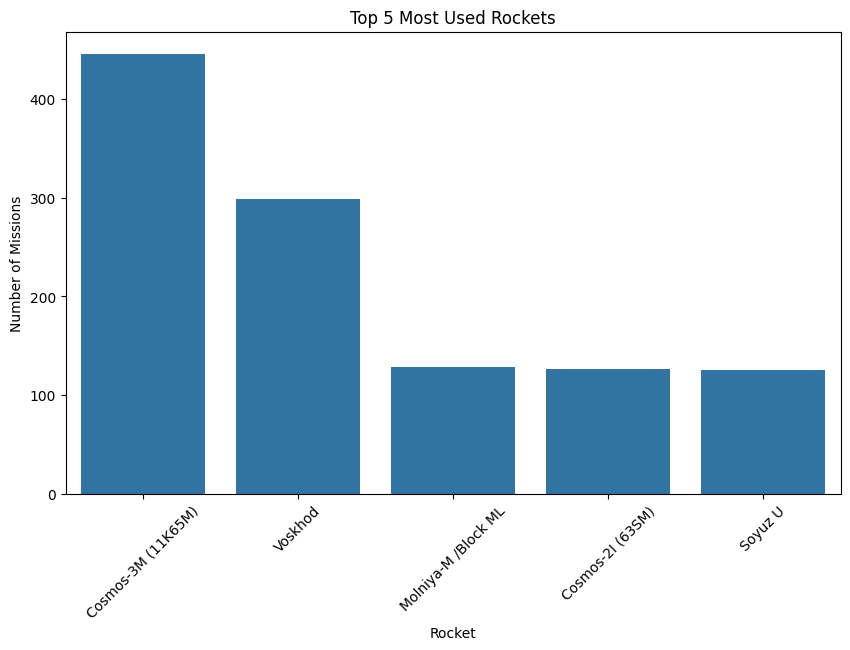

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rocket', y='Mission_Count', data=top_n_most_used_rockets)
plt.title('Top 5 Most Used Rockets')
plt.xlabel('Rocket')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()


From this barplot I can see that the Cosmos-3M (11K65M) is the Rocket that has been used most and builded by RVSN USSR. However, all of the five rockets are build by the RVSN USSR. So from this graph I can conclude that the RVSN USSR has build a very high number of rocket for space missions.
In addition, I can suppose that the Cosmos-3M (11K65M), which is the most used, indicates it was highly reliable and frequently used for various purposes by the USSR and this may indicates that it was the workhorse of the Soviet space fleet.
Also, the diversity in rocket types suggests that the USSR developed different rockets for various mission profiles, showcasing their advancement and specialization in space technology over time.

### This barplot shows the first five rockets with the highest success rate.

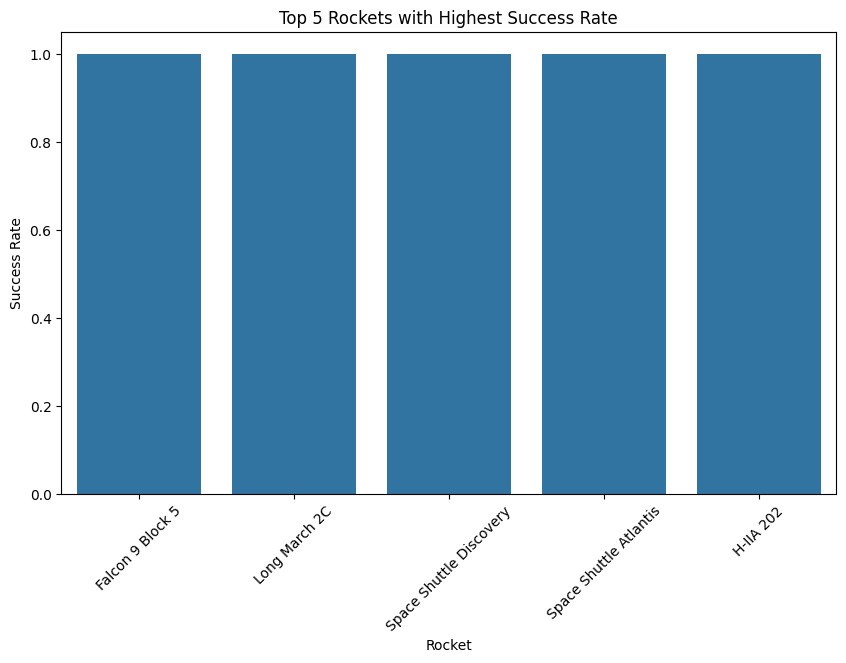

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rocket', y='Success_Rate', data=top_n_highest_success_rate_rockets)
plt.title('Top 5 Rockets with Highest Success Rate')
plt.xlabel('Rocket')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()


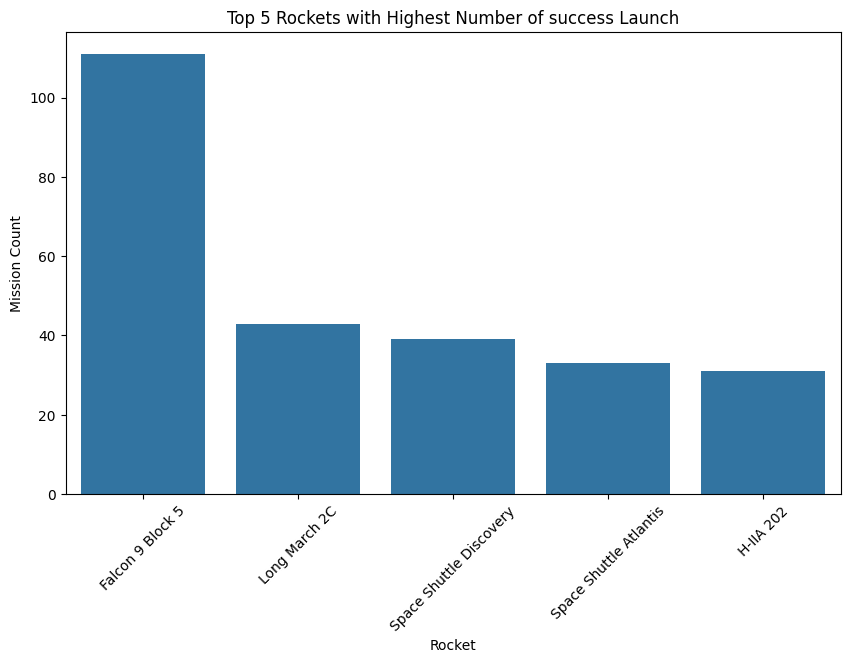

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rocket', y='Mission_Count', data=top_n_highest_success_rate_rockets)
plt.title('Top 5 Rockets with Highest Number of success Launch')
plt.xlabel('Rocket')
plt.ylabel('Mission Count')
plt.xticks(rotation=45)
plt.show()

From this two boxplot I can say that SpaceX and NASA dominate the top positions for rockets with the highest success rates. Searching on-line I have seen that this is due to the fact that the Falcon 9 launches are advertised at $62 million, much cheaper than other providers, which can cost upwards of $165 million per launch. These savings are mainly due to SpaceX's ability to reuse the first stage of their rockets, reducing per-launch costs and enabling more frequent launches sustainably.Also, SpaceX has heavily invested in advanced technologies to improve the reliability and efficiency of its rockets. Autonomous landing systems allow rockets to return to Earth in a controlled manner, ready for reuse. This not only lowers costs but also increases launch frequency.

## Line plot

Visualize the launch success yearly trend

In [151]:
# This function extract years from the date 
def Extract_year(date):
    year = []
    for i in date:
        year.append(i.year)
    return year

df['Year'] = Extract_year(df['Date'])


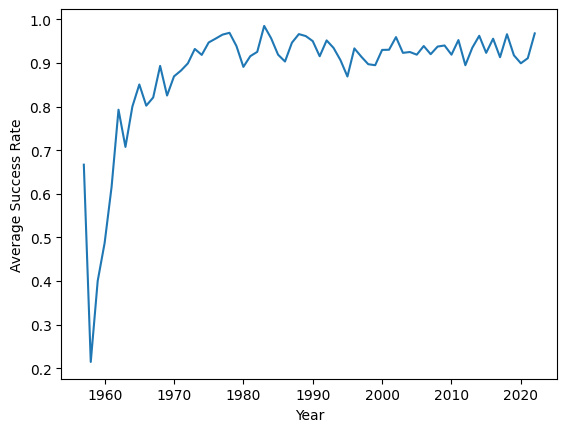

In [161]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

sns.lineplot(x='Year', y="Class", data=success_rate_by_year)
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.show()

In [163]:
# Definisci a function to extract the year from the df
def Extract_year(date):
    return date.year

# Add a Year column to the df
df['Year'] = df['Date'].apply(Extract_year)

# Group by the data for year and calculate the total number of launch and the number of success launch for every year
success_rate_by_year1 = df.groupby('Year')['Class'].agg(Total='count', Success=lambda x: (x == 1).sum())

# Calculate the success rate for every year
success_rate_by_year1['Success Rate'] = (success_rate_by_year1['Success'] / success_rate_by_year1['Total']) * 100

# Reset the index
success_rate_by_year1 = success_rate_by_year1.reset_index()

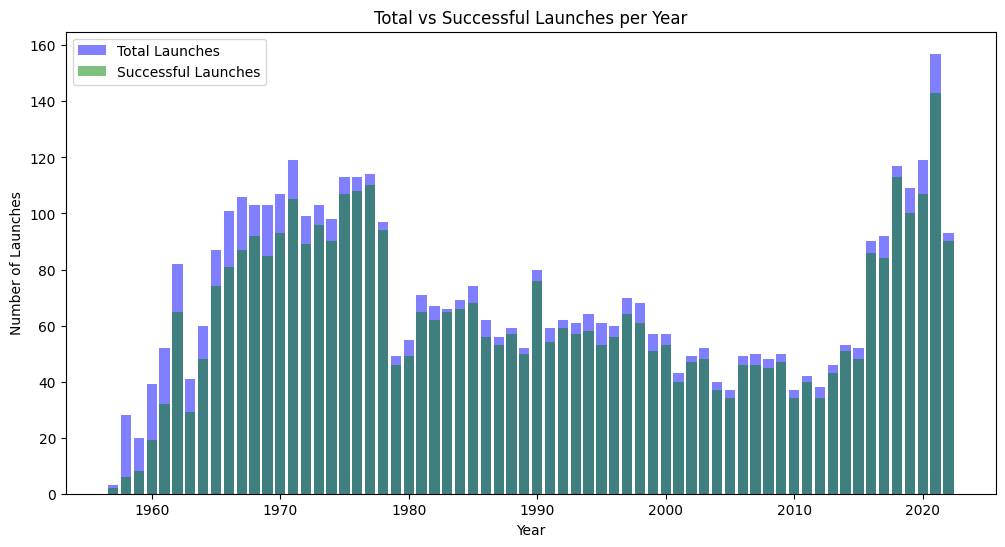

In [169]:
years = success_rate_by_year1['Year']
total_launches = success_rate_by_year1['Total']
successful_launches = success_rate_by_year1['Success']

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(years, total_launches, color='blue', alpha=0.5, label='Total Launches')
plt.bar(years, successful_launches, color='green', alpha=0.5, label='Successful Launches')

plt.title('Total vs Successful Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()

# Show the graph
plt.show()

From this graph I can see that in the early years of space missions (1957) the success rate was much lower than in recent years. In particular in the years from 1957 to 1963 this rate fluctuates a lot, reaching a minimum of 21% in the 1958's. That's because during this year, the NOTS-EV-1 Pilot Rocket was launched 10 times beetwen July and August and every launch was a failure. The causes where unknown, or rather, an Internet search didn't solve the mystery.


# Launch Site Locations

Now I will create a map, using Folium, which contains marks fot the most used launch sites.

In [174]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

First, I'm going to create a dataframe in which I put the 4 locations with the highly number of launches and their latidute and longitude coordinates.

In [204]:
data_geo = {'Location': ["Site 31/6, Baikonur Cosmodrome, Kazakhstan", "Site 132/1, Plesetsk Cosmodrome, Russia", "LC-39A, Kennedy Space Center, Florida, USA", "ELA-2, Guiana Space Centre, French Guiana, France"],
        'Latitude': [45.991, 62.92556, 28.60839, 5.18444],
        'Longitude': [63.5585, 40.57778, -80.60433, -52.7625],
        'Num_ of_Launch': [251, 216, 149, 118 ]} 

In [205]:
# Create a dataframe
data_geo_coor = pd.DataFrame(data_geo)

In [206]:
data_geo_coor

,Location,Latitude,Longitude,Num_ of_Launch
0,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",45.99100,63.55850,251
1,"Site 132/1, Plesetsk Cosmodrome, Russia",62.92556,40.57778,216
2,"LC-39A, Kennedy Space Center, Florida, USA",28.60839,-80.60433,149
3,"ELA-2, Guiana Space Centre, French Guiana, France",5.18444,-52.76250,118


In [207]:
# Save it to a csv
data_geo_coor.to_csv('data_geo_coor.csv', index=False)

Then, I create a folium `Map` object and add a highlighted circle area with a text label on a specific coordinate:

In [208]:
site_map = folium.Map()

for index, row in data_geo_coor.iterrows():
    coordinates = [row['Latitude'], row['Longitude']]
    circle = folium.Circle(coordinates, radius=1000, color='#d35400', fill=True).add_child(folium.Popup(row['Location']))
    marker = folium.Marker(coordinates, icon=folium.DivIcon(html=f'<div style="font-size: 12; color:#d35400;"><b>{row["Location"]}</b><br>{row["Num_ of_Launch"]} launches</div>'))
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

Seeing this map I can see that all four launch sites are close to the sea or located in areas where houses, railroads, and roads are absent. This is because it is common practice to land rockets in the sea or otherwise in deserted areas to avoid disasters.